# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [24]:
#Read in data from source 
df = pd.read_csv("../assets/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [25]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [26]:
df.describe()

C:\Users\loisgan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: It has much larger scale. 

#### Question 4. Drop data points with missing data


In [27]:
df1 = df.dropna()
df1.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [28]:
df1.isnull().values.any()

False

In [29]:
df.isnull().values.any()

True

Answer: Now no more missing data

#### Question 6. Create box plots for GRE and GPA

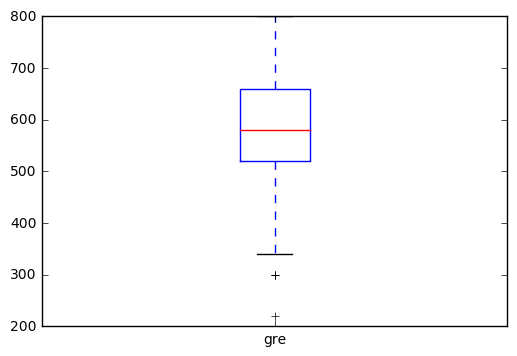

In [30]:
df1['gre'].plot.box()
plt.show()

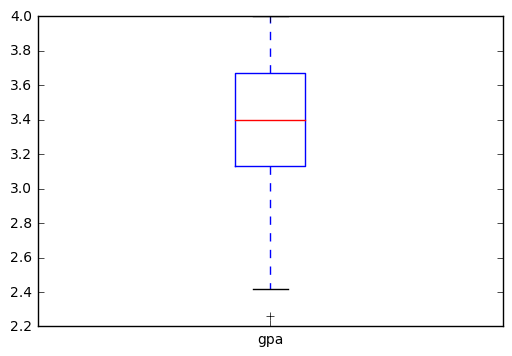

In [24]:
df1['gpa'].plot.box()

#### Question 7. What do this plots show?

Answer: Mean, quartiles, outliers

#### Question 8. Describe each distribution 

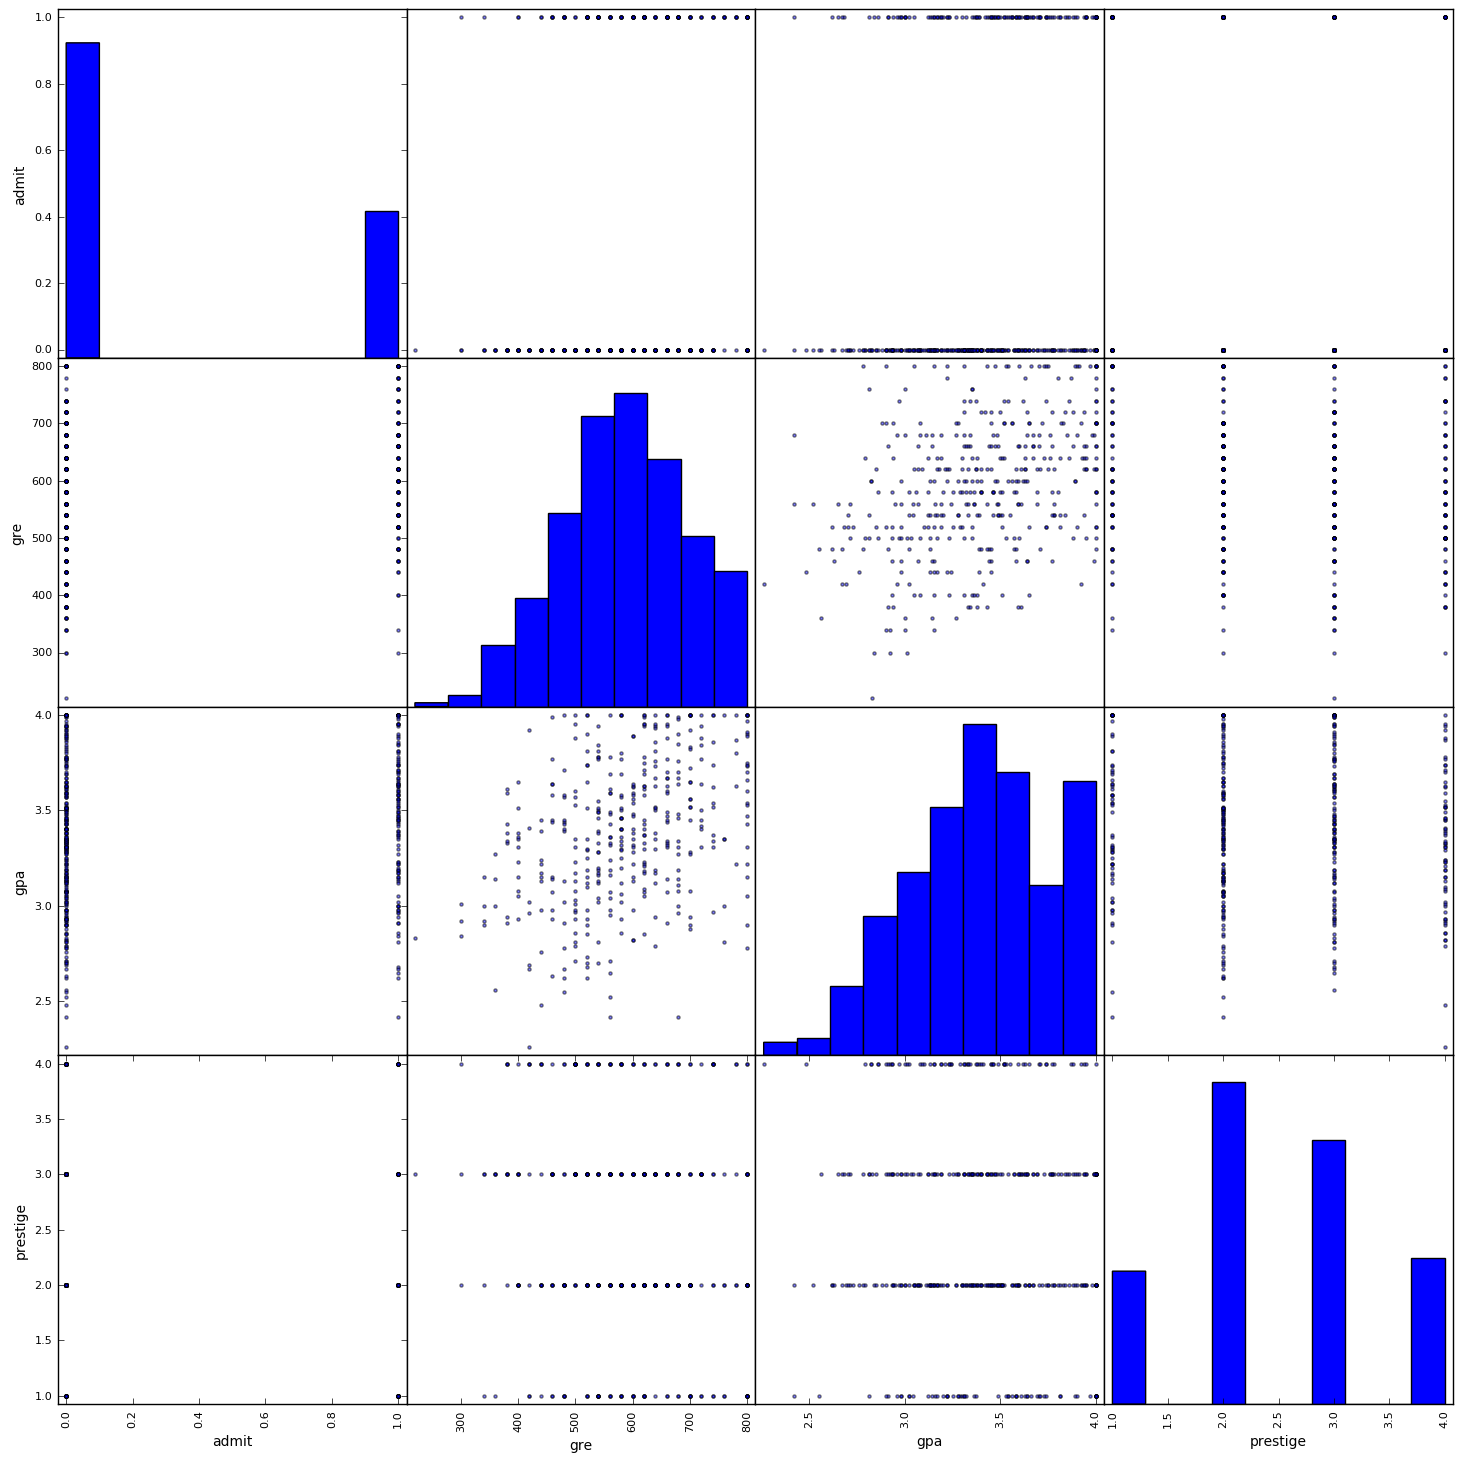

In [31]:
# plot the distribution of each variable 
pd.scatter_matrix(df1, figsize=(18,18))
plt.show()


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [32]:
print(df1['gre'].skew())
print(df1['gpa'].skew())

-0.146046988216
-0.216888932969


Answer: No. As they are skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Probably. Otherwise they might distort the association towards the outlier. Can use log transform to correct, as they are >0

#### Question 11. Which of our variables are potentially colinear? 

In [12]:
# create a correlation matrix for the data
df1.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and gpa probably colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Get dummies for prestige variable. 
2. Feed the 3 new dummies variables into linear model. 

#### Question 14. What is your hypothesis? 

Answer: Null hypotheses: there is no association between admissions and prestige. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [33]:
df2 = df.fillna(0, inplace=True)

#### 2. Bonus: Log transform the skewed data

In [34]:
gre = preprocessing.scale(np.sqrt(df1['gre']))
print(skew(gre))

-0.4253375144076474


In [35]:
from scipy.stats import boxcox
gre1 = preprocessing.scale(boxcox(df1['gre'])[0])
print(skew(gre))

-0.4253375144076474


(array([  1.,   7.,  23.,  30.,  61.,  79.,  74.,  43.,  44.,  35.]),
 array([-2.95309247, -2.46864313, -1.98419378, -1.49974443, -1.01529508,
        -0.53084573, -0.04639639,  0.43805296,  0.92250231,  1.40695166,
         1.891401  ]),
 <a list of 10 Patch objects>)

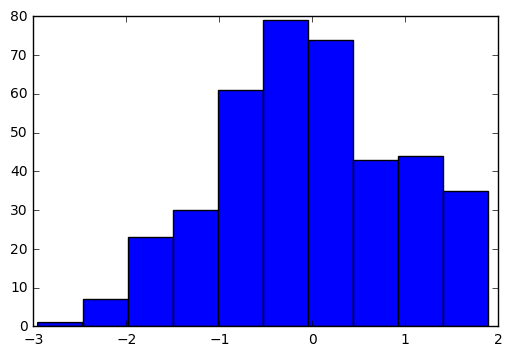

In [18]:
plt.hist(gre1)

#### 3. Advanced: Impute missing data

In [23]:
print(df.isnull().sum())

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [36]:
from sklearn.preprocessing import Imputer
df3 = Imputer().fit_transform(df.values)
print(np.isnan(df3).sum())

0
